<a href="https://colab.research.google.com/github/Joe-hyper/KENTUCKY-FRIED-SCIENTISTS-GROUP-PROJECT./blob/main/Copy_of_Copy_of_Factors_Affecting_The_Occurrence_of_Lung_Cancer%20in%20Thailand.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1.Defining the question.**

### a) Specifying the question
To study the factors affecting prevalence of lung cancer among people


### b) Defining the metric for success
The study will be considered a success if the factors affecting the occurrence of lung cancer among farmers in Thailand are determined.


### c) Understanding the context.

Anyone can get lung cancer. Lung cancer happens when cells in the lung mutate or change. Various factors can cause this mutation to happen. Most often, this change in lung cells happens when people breathe in dangerous, toxic substances. Even if you were exposed to these substances many years ago, you are still at risk for lung cancer. Two major types of lung cancer are non-small cell lung cancer and small cell lung cancer. 
According to the American Lung Association, smoking causes about 90% of lung cancer cases. However, there are other causes of lung cancer such as passive smoking, exposure to radioactive gasses such as radon to which research reveals that it is the second leading cause of cancer and one out of every 15 homes in the U.S. is subject to radon exposure. Other causes include; exposure to certain toxins such as pesticides, air pollution and family history. Its symptoms include a cough that often has traces of blood, chest pain, wheezing and weight loss. These symptoms often don't appear until the cancer is advanced.Treatments vary but may include surgery, chemotherapy, radiation therapy, targeted drug therapy and immunotherapy.


### d) Recording the experimental design
      a)Find and deal with outliers, anomalies, and missing data within the dataset.
      b)Plot appropriate univariate and bivariate summaries recording our    observations.
      c)Implement the solution by performing hypothesis testing.
      d)This will need to be documented when writing the report. 

### e) Data Relevance

The dataset is from Nakhon Sawan, Thailand on a case study control in Pesticide exposure and lung cancer risk from the year 2021.

### f) Hypothesis

Null hypothesis: The proportion number of farmers who have lung cancer is equal to the proportion number of non-farmers who have lung cancer

Alternative hypothesis: The proportion number of farmers who have lung cancer is not equal to the proportion number of non-farmers who have lung cancer

Null hypothesis: The likelihood of contracting lung cancer among males is equal to the likelihood of contracting lung cancer among female

Alternative hypothesis: The likelihood of contracting lung cancer among males is not equal to the likelihood of contracting lung cancer among females

# **2. Importing Libraries.**

In [ ]:
# importing all libraries required
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import sklearn as sk
from scipy import stats
from scipy.stats import normaltest
import os
from sklearn.impute import SimpleImputer
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import warnings
warnings.filterwarnings('ignore')


# **3. Loading the Data.**

In [ ]:
# loading the dataset.
# first upload dataset pesticide and lung cancer csv onto collab
url = 'https://figshare.com/ndownloader/files/26424605'
lungCa = pd.read_csv(url)


# **4. Data Understanding.**

In [ ]:
# shape of data
print(f'The dataset has {lungCa.shape[0]} records, and {lungCa.shape[1]} columns.')

The dataset has 680 records, and 68 columns.


In [ ]:
# lets check the info of the dataset
lungCa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 680 entries, 0 to 679
Data columns (total 68 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID                                         680 non-null    float64
 1   LungCA                                     680 non-null    int64  
 2   Gender                                     680 non-null    int64  
 3   age                                        680 non-null    int64  
 4   age_group                                  680 non-null    int64  
 5   status                                     680 non-null    int64  
 6   education                                  680 non-null    int64  
 7   Occupation                                 680 non-null    int64  
 8   Residency                                  680 non-null    int64  
 9   Distances                                  680 non-null    int64  
 10  Cooking_fumes             

In [ ]:
# finding out the data types in our column
lungCa.dtypes

ID                           float64
LungCA                         int64
Gender                         int64
age                            int64
age_group                      int64
                              ...   
Armure_Propiconazole_use       int64
Armure_Propiconazole_days     object
Metal_aldehyde_use             int64
Metal_aldehyde_days           object
Morphology_Group               int64
Length: 68, dtype: object

A couple of columns had inappropiate data types. These columns had object instead of numerical data.

'Cigarette_total', 'Cigarette_number', 'Herbicides_year', 'Herbicide_year_group', 'Herbicide_day', 'Number_Days_Herbicides_Use_Quartile_431', 'Number_Years_Insecticides_Use_432', 'Number_Years_Insecticides_Use_Group_432', 'Number_Days_Insecticides_Use_432', 'Number_Days_Insecticides_Use_Quartile_432', 'Number_Years_Fungticides_Use_433'
'Number_Years_Fungicides_Use_Group_433', 'Number_Days_Fungicides_Use_433', 'Number_Days_Fungicides_Use_Quartile_433', 'Dieldrin_days', 'DDT_days', 'Chlorpylifos_days', 'Folidol_days', 'Mevinphos_days', 'Carbaryl_Savins_days', 'Carbofuran_days', 'Abamectin_days' 'Armure_Propiconazole_days', 'Metal_aldehyde_days' 

In [ ]:
# preview of the first three records of the dataset
lungCa.head(3)

,ID,LungCA,Gender,age,age_group,status,education,Occupation,Residency,Distances,...,Carbaryl_Savins_days,Carbofuran_use,Carbofuran_days,Abamectin_use,Abamectin_days,Armure_Propiconazole_use,Armure_Propiconazole_days,Metal_aldehyde_use,Metal_aldehyde_days,Morphology_Group
0,1.0,1,1,75,4,2,1,1,2,1,...,,0,,0,,0,,0,,1
1,1.1,0,1,70,3,2,1,1,3,1,...,,0,,0,,0,,0,,0
2,1.2,0,1,72,3,2,1,1,2,1,...,,0,,0,,0,,0,,0


In [ ]:
# preview last three records
lungCa.tail(3)

,ID,LungCA,Gender,age,age_group,status,education,Occupation,Residency,Distances,...,Carbaryl_Savins_days,Carbofuran_use,Carbofuran_days,Abamectin_use,Abamectin_days,Armure_Propiconazole_use,Armure_Propiconazole_days,Metal_aldehyde_use,Metal_aldehyde_days,Morphology_Group
677,292.0,1,0,67,3,2,1,1,3,1,...,960,0,,1,360,0,,0,,1
678,292.1,0,0,62,2,2,1,2,1,1,...,,0,,0,,0,,0,,0
679,292.2,0,0,72,3,2,1,2,3,3,...,,0,,0,,0,,0,,0


##5. **Data Cleaning**

### a) Validity

In [ ]:
lungCa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 680 entries, 0 to 679
Data columns (total 68 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID                                         680 non-null    float64
 1   LungCA                                     680 non-null    int64  
 2   Gender                                     680 non-null    int64  
 3   age                                        680 non-null    int64  
 4   age_group                                  680 non-null    int64  
 5   status                                     680 non-null    int64  
 6   education                                  680 non-null    int64  
 7   Occupation                                 680 non-null    int64  
 8   Residency                                  680 non-null    int64  
 9   Distances                                  680 non-null    int64  
 10  Cooking_fumes             

In [ ]:
# Specifying all columns with object data to numerical
cols = lungCa.columns[lungCa.dtypes.eq('object')]
cols

Index(['Cigarette_total', 'Cigarette_number', 'Herbicides_year',
       'Herbicide_year_group', 'Herbicide_day',
       'Number_Days_Herbicides_Use_Quartile_431',
       'Number_Years_Insecticides_Use_432',
       'Number_Years_Insecticides_Use_Group_432',
       'Number_Days_Insecticides_Use_432',
       'Number_Days_Insecticides_Use_Quartile_432',
       'Number_Years_Fungticides_Use_433',
       'Number_Years_Fungicides_Use_Group_433',
       'Number_Days_Fungicides_Use_433',
       'Number_Days_Fungicides_Use_Quartile_433', 'Dieldrin_days', 'DDT_days',
       'Chlorpylifos_days', 'Folidol_days', 'Mevinphos_days',
       'Carbaryl_Savins_days', 'Carbofuran_days', 'Abamectin_days',
       'Armure_Propiconazole_days', 'Metal_aldehyde_days'],
      dtype='object')

- Some columns have inappropiate datatypes

In [ ]:
# Converting columns with object to numerical
lungCa[cols] = lungCa[cols].apply(pd.to_numeric, errors='coerce')

### b) Completeness

In [ ]:
# Checking for missing values
lungCa.isnull().any().sum()

24

24 Columns have missing values

In [ ]:
#Checking for the Missing values
# Using isnull fuction to count the total null values in each field
total = lungCa.isnull().sum().sort_values(ascending=False) 
# Percent of missing values is estimated by dividing total missing and the original total
percent = (lungCa.isnull().sum()/lungCa.isnull().count()).sort_values(ascending=False)
# Concatenating the Total and Percent fields sing pandas concat fucntion
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
# Displays
missing_data.head(25)

,Total,Percent
Mevinphos_days,642,0.944118
Metal_aldehyde_days,637,0.936765
Dieldrin_days,636,0.935294
Carbaryl_Savins_days,632,0.929412
DDT_days,630,0.926471
Chlorpylifos_days,610,0.897059
Armure_Propiconazole_days,600,0.882353
Carbofuran_days,595,0.875000
Folidol_days,576,0.847059
Number_Days_Fungicides_Use_433,564,0.829412


14 columns have over 80.29% of its records missing

In [ ]:
# Specify my_imputer
my_imputer = SimpleImputer(missing_values=np.NaN, strategy = 'mean')

# Eliminating null values Cigarette_number
lungCa.Cigarette_number = my_imputer.fit_transform(lungCa['Cigarette_number'].values.reshape(-1,1))[:, 0]

# Eliminating null values Cigarette_total
lungCa.Cigarette_total = my_imputer.fit_transform(lungCa['Cigarette_total'].values.reshape(-1,1))[:, 0]

# Eliminating null values Herbicide_years
lungCa.Herbicides_year = my_imputer.fit_transform(lungCa['Herbicides_year'].values.reshape(-1,1))[:, 0]

# Eliminating null values Herbicide_year_group
lungCa.Herbicide_year_group = my_imputer.fit_transform(lungCa['Herbicide_year_group'].values.reshape(-1,1))[:, 0]

# Eliminating null values Herbicide_day
lungCa.Herbicide_day = my_imputer.fit_transform(lungCa['Herbicide_day'].values.reshape(-1,1))[:, 0]

# Eliminating null values Number_Days_Herbicides_Use_Quartile_431
lungCa.Number_Days_Herbicides_Use_Quartile_431 = my_imputer.fit_transform(lungCa['Number_Days_Herbicides_Use_Quartile_431'].values.reshape(-1,1))[:, 0]

# Eliminating null values Number_Years_Insecticides_Use_432
lungCa.Number_Years_Insecticides_Use_432 = my_imputer.fit_transform(lungCa['Number_Years_Insecticides_Use_432'].values.reshape(-1,1))[:, 0]

# Eliminating null values Number_Years_Insecticides_Use_Group_432
lungCa.Number_Years_Insecticides_Use_Group_432 = my_imputer.fit_transform(lungCa['Number_Years_Insecticides_Use_Group_432'].values.reshape(-1,1))[:, 0]

# Eliminating null values Number_Days_Insecticides_Use_432
lungCa.Number_Days_Insecticides_Use_432 = my_imputer.fit_transform(lungCa['Number_Days_Insecticides_Use_432'].values.reshape(-1,1))[:, 0]

# Eliminating null values Number_Days_Insecticides_Use_Quartile_432
lungCa.Number_Days_Insecticides_Use_Quartile_432 = my_imputer.fit_transform(lungCa['Number_Days_Insecticides_Use_Quartile_432'].values.reshape(-1,1))[:, 0]

# Eliminating null values Abamectin_days
lungCa.Abamectin_days = my_imputer.fit_transform(lungCa['Abamectin_days'].values.reshape(-1,1))[:, 0]

# Eliminating null values Number_Years_Fungticides_Use_433
lungCa.Number_Years_Fungticides_Use_433 = my_imputer.fit_transform(lungCa['Number_Years_Fungticides_Use_433'].values.reshape(-1,1))[:, 0]

# Eliminating null values Number_Years_Fungicides_Use_Group_433
lungCa.Number_Years_Fungicides_Use_Group_433 = my_imputer.fit_transform(lungCa['Number_Years_Fungicides_Use_Group_433'].values.reshape(-1,1))[:, 0]

# Eliminating null values Number_Days_Fungicides_Use_Quartile_433
lungCa.Number_Days_Fungicides_Use_Quartile_433 = my_imputer.fit_transform(lungCa['Number_Days_Fungicides_Use_Quartile_433'].values.reshape(-1,1))[:, 0]

# Eliminating null values Number_Days_Fungicides_Use_433
lungCa.Number_Days_Fungicides_Use_433 = my_imputer.fit_transform(lungCa['Number_Days_Fungicides_Use_433'].values.reshape(-1,1))[:, 0]

# Eliminating null values Folidol_days
lungCa.Folidol_days = my_imputer.fit_transform(lungCa['Folidol_days'].values.reshape(-1,1))[:, 0]

# Eliminating null values Carbofuran_days
lungCa.Carbofuran_days = my_imputer.fit_transform(lungCa['Carbofuran_days'].values.reshape(-1,1))[:, 0]

# Eliminating null values Armure_Propiconazole_days
lungCa.Armure_Propiconazole_days = my_imputer.fit_transform(lungCa['Armure_Propiconazole_days'].values.reshape(-1,1))[:, 0]

# Eliminating null values Chlorpylifos_days
lungCa.Chlorpylifos_days = my_imputer.fit_transform(lungCa['Chlorpylifos_days'].values.reshape(-1,1))[:, 0]

# Eliminating null values DDT_days
lungCa.DDT_days = my_imputer.fit_transform(lungCa['DDT_days'].values.reshape(-1,1))[:, 0]

# Eliminating null values Carbaryl_Savins_days
lungCa.Carbaryl_Savins_days = my_imputer.fit_transform(lungCa['Carbaryl_Savins_days'].values.reshape(-1,1))[:, 0]

# Eliminating null values Dieldrin_days
lungCa.Dieldrin_days = my_imputer.fit_transform(lungCa['Dieldrin_days'].values.reshape(-1,1))[:, 0]

# Eliminating null values Metal_aldehyde_days
lungCa.Metal_aldehyde_days = my_imputer.fit_transform(lungCa['Metal_aldehyde_days'].values.reshape(-1,1))[:, 0]

# Eliminating null values Mevinphos_days
lungCa.Mevinphos_days = my_imputer.fit_transform(lungCa['Mevinphos_days'].values.reshape(-1,1))[:, 0]


In [ ]:
# Checking any values remaining
lungCa.isnull().any().sum()

0

No null values remaining

### c) Consistency

In [ ]:
# lets check for any duplicate values
lungCa.duplicated().any().any().sum()

0

The dataset has no duplicates

### d) Uniformity

In [ ]:
# Ensure uniformity by changing the column names to lower case, stripping of the whitespaces,removing periods, 
# this ensures good readerbility plus every possible naming issue is covered.
# This is to be applied to the lung cancer
lungCa.columns = lungCa.columns.str.lower().str.strip().str.replace(' ', '_').str.replace('.', '')
lungCa.head()

,id,lungca,gender,age,age_group,status,education,occupation,residency,distances,...,carbaryl_savins_days,carbofuran_use,carbofuran_days,abamectin_use,abamectin_days,armure_propiconazole_use,armure_propiconazole_days,metal_aldehyde_use,metal_aldehyde_days,morphology_group
0,1.0,1,1,75,4,2,1,1,2,1,...,818.520833,0,733.270588,0,477.716418,0,356.5625,0,592.511628,1
1,1.1,0,1,70,3,2,1,1,3,1,...,818.520833,0,733.270588,0,477.716418,0,356.5625,0,592.511628,0
2,1.2,0,1,72,3,2,1,1,2,1,...,818.520833,0,733.270588,0,477.716418,0,356.5625,0,592.511628,0
3,2.0,1,0,58,2,2,1,1,3,1,...,818.520833,1,480.000000,0,477.716418,0,356.5625,1,592.511628,2
4,2.1,0,0,55,2,2,1,1,3,1,...,818.520833,0,733.270588,0,477.716418,0,356.5625,0,592.511628,0


- Uniformity was ensured by changing the column names to lower case, stripping of the whitespaces,removing periods, 
- This ensures good readerbility plus every possible naming issue is covered.

### e) Dealing with outliers

In [ ]:
# Checking for outliers
# Selecting continuous columns only.
numerical = list(lungCa.select_dtypes(exclude=['object']).columns)

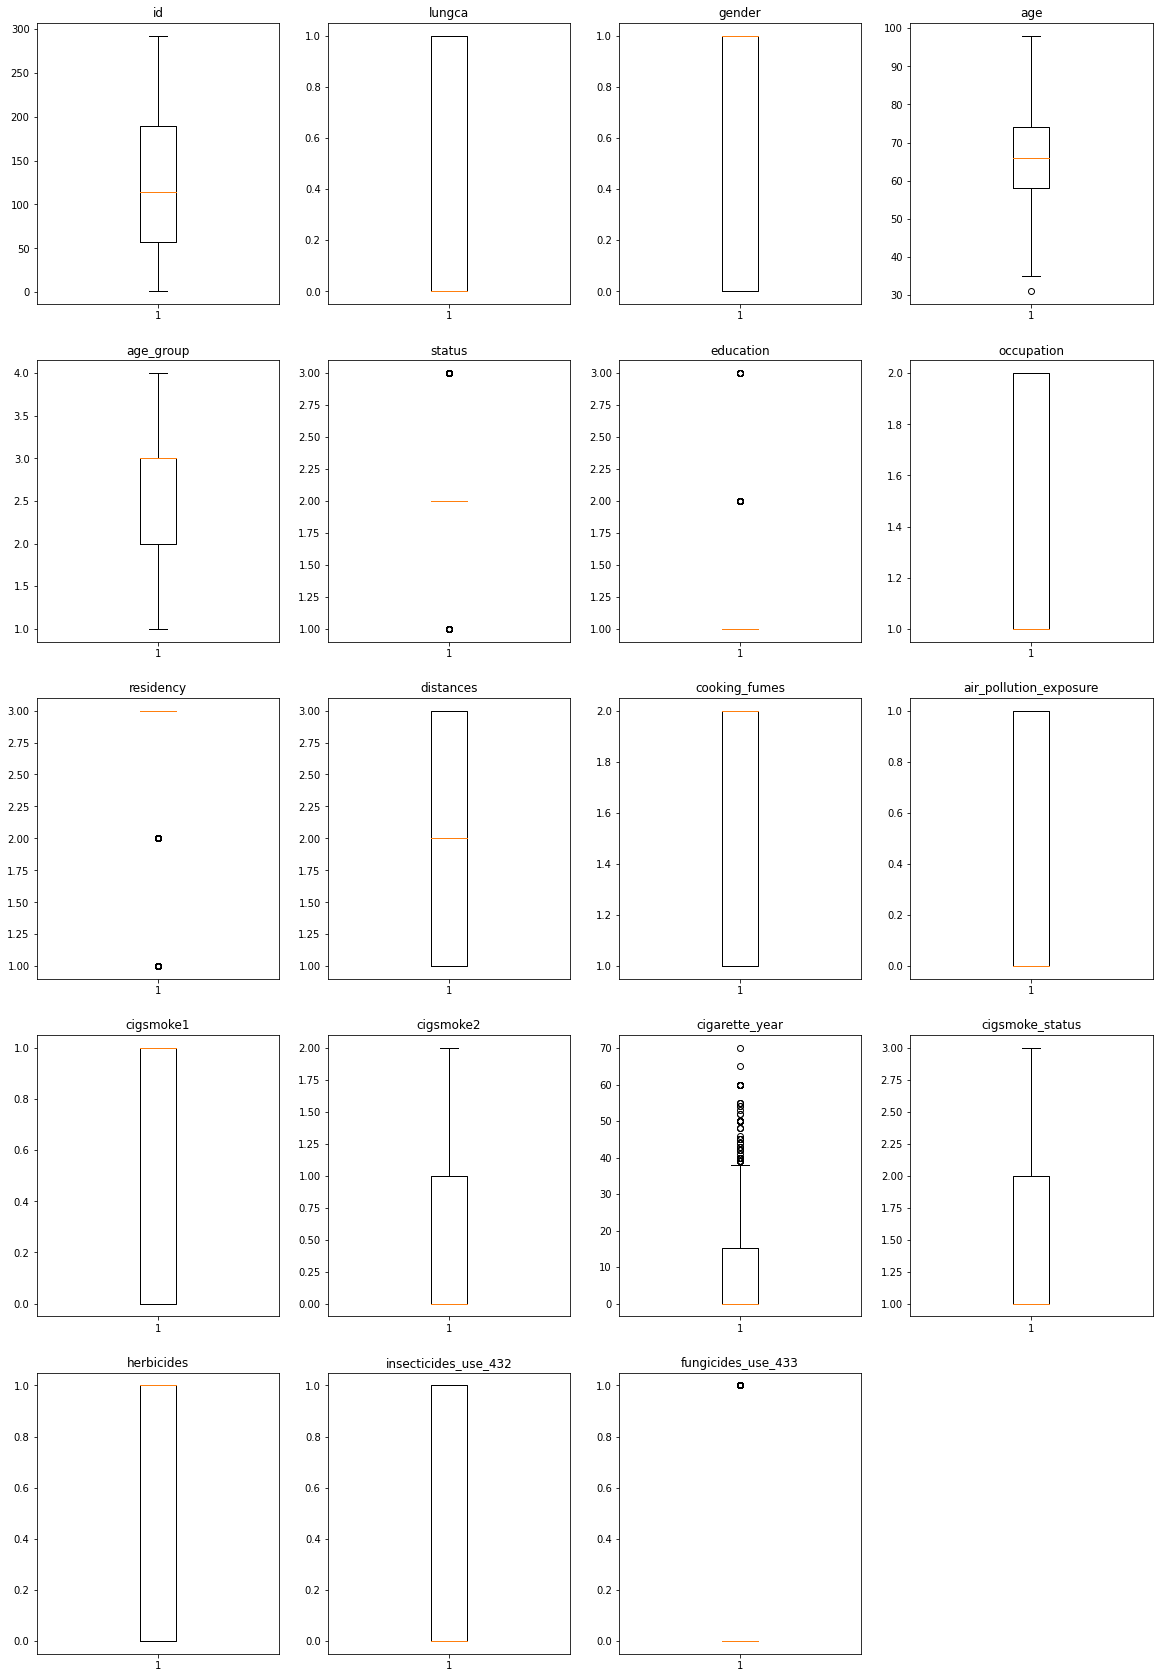

In [ ]:
# saving columns in a dictionary
columns_dict={'id': 1, 'lungca': 2, 'gender': 3, 'age': 4, 
                   'age_group': 5, 'status': 6, 'education': 7, 'occupation': 8, 'residency': 9, 
                   'distances': 10, 'cooking_fumes': 11, 'air_pollution_exposure': 12, 'cigsmoke1': 13, 'cigsmoke2': 14, 'cigarette_year': 15, 
                   'cigsmoke_status': 16, 'herbicides': 17, 'insecticides_use_432': 18, 
                   'fungicides_use_433': 19}

plt.figure(figsize=(20,30))

# make a boxplot for each numerical column
for variable,i in columns_dict.items():
  plt.subplot(5,4,i)
  plt.boxplot(lungCa[variable])
  plt.title(variable)

plt.show()

- No outliers

# **6. Analysis**

## a) Univariate Analysis


### i) Categorical Columns

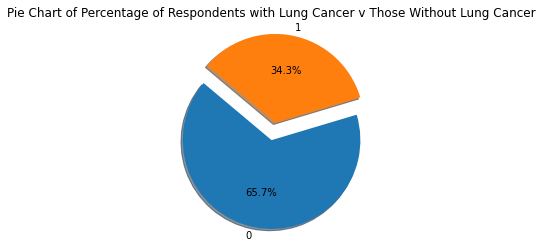

In [ ]:
# Plot pie chart the ratio of lung cancer respondents and non lung cancer respondents.
plt.pie(lungCa['lungca'].value_counts(normalize=True), labels =lungCa['lungca'].value_counts().index, autopct = '%1.1f%%', shadow = True,explode=(0.2,0), startangle = 140)

# Plot axis
plt.axis('equal')

# Insert title
plt.title('Pie Chart of Percentage of Respondents with Lung Cancer v Those Without Lung Cancer')

# Show plot
plt.show()

1. 0 represents those without lung cancer, 1 represents those with lung cancer.

2. We observe that 65.7% of our respondents don't have lung cancer but it certainly doesn't rule them out from being at risk of lung cancer or any other types of cancer.

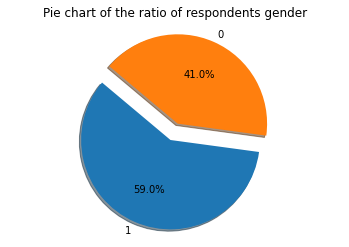

In [ ]:
# Plotpie chart the ratio of respondents gender
plt.pie(lungCa['gender'].value_counts(normalize=True), labels =lungCa['gender'].value_counts().index, autopct = '%1.1f%%', shadow = True,explode=(0.2,0), startangle = 140)

# Plot axis
plt.axis('equal')

# Insert title
plt.title('Pie chart of the ratio of respondents gender')

# Show plot
plt.show()

1 Represents Males in study = 59%

0 Represents Females in the study = 41.0%  

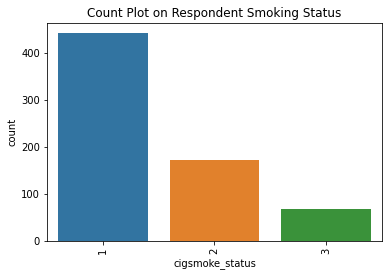

<Figure size 432x288 with 0 Axes>

In [ ]:
# Plotting count plot
sns.countplot(x='cigsmoke_status',data=lungCa)

# Inserting title
plt.title("Count Plot on Respondent Smoking Status")

# Rotation
plt.xticks(rotation=90)

# Show plot
plt.show()

# Savefigure
plt.savefig('CountPlotonCity.png')

1. 1 represents people who have never smoked, 2 represents ex smokers, 3 represents smokers.

2. We observe from the distribution plot that most respondents had never smoked. 
3. This could be attributed to the significant reduction in smoking culture in Thailand.

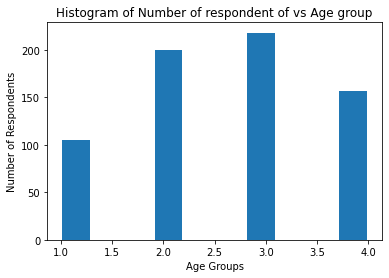

In [ ]:
# Specifying Caage
Caage = lungCa['age_group']

# plotting histogram
plt.hist(Caage, bins=10, histtype='bar', rwidth=0.9)

# label X axis
plt.xlabel('Age Groups')

# Label Y axis
plt.ylabel('Number of Respondents')

# Label title
plt.title('Histogram of Number of respondent of vs Age group')

# Show plot
plt.show()

From histogram plot, we note that the age group with the highest number of respondents is age 65 - 74 years. 

This is because, it is at this ages where rates of cancer are highest in Thailand.

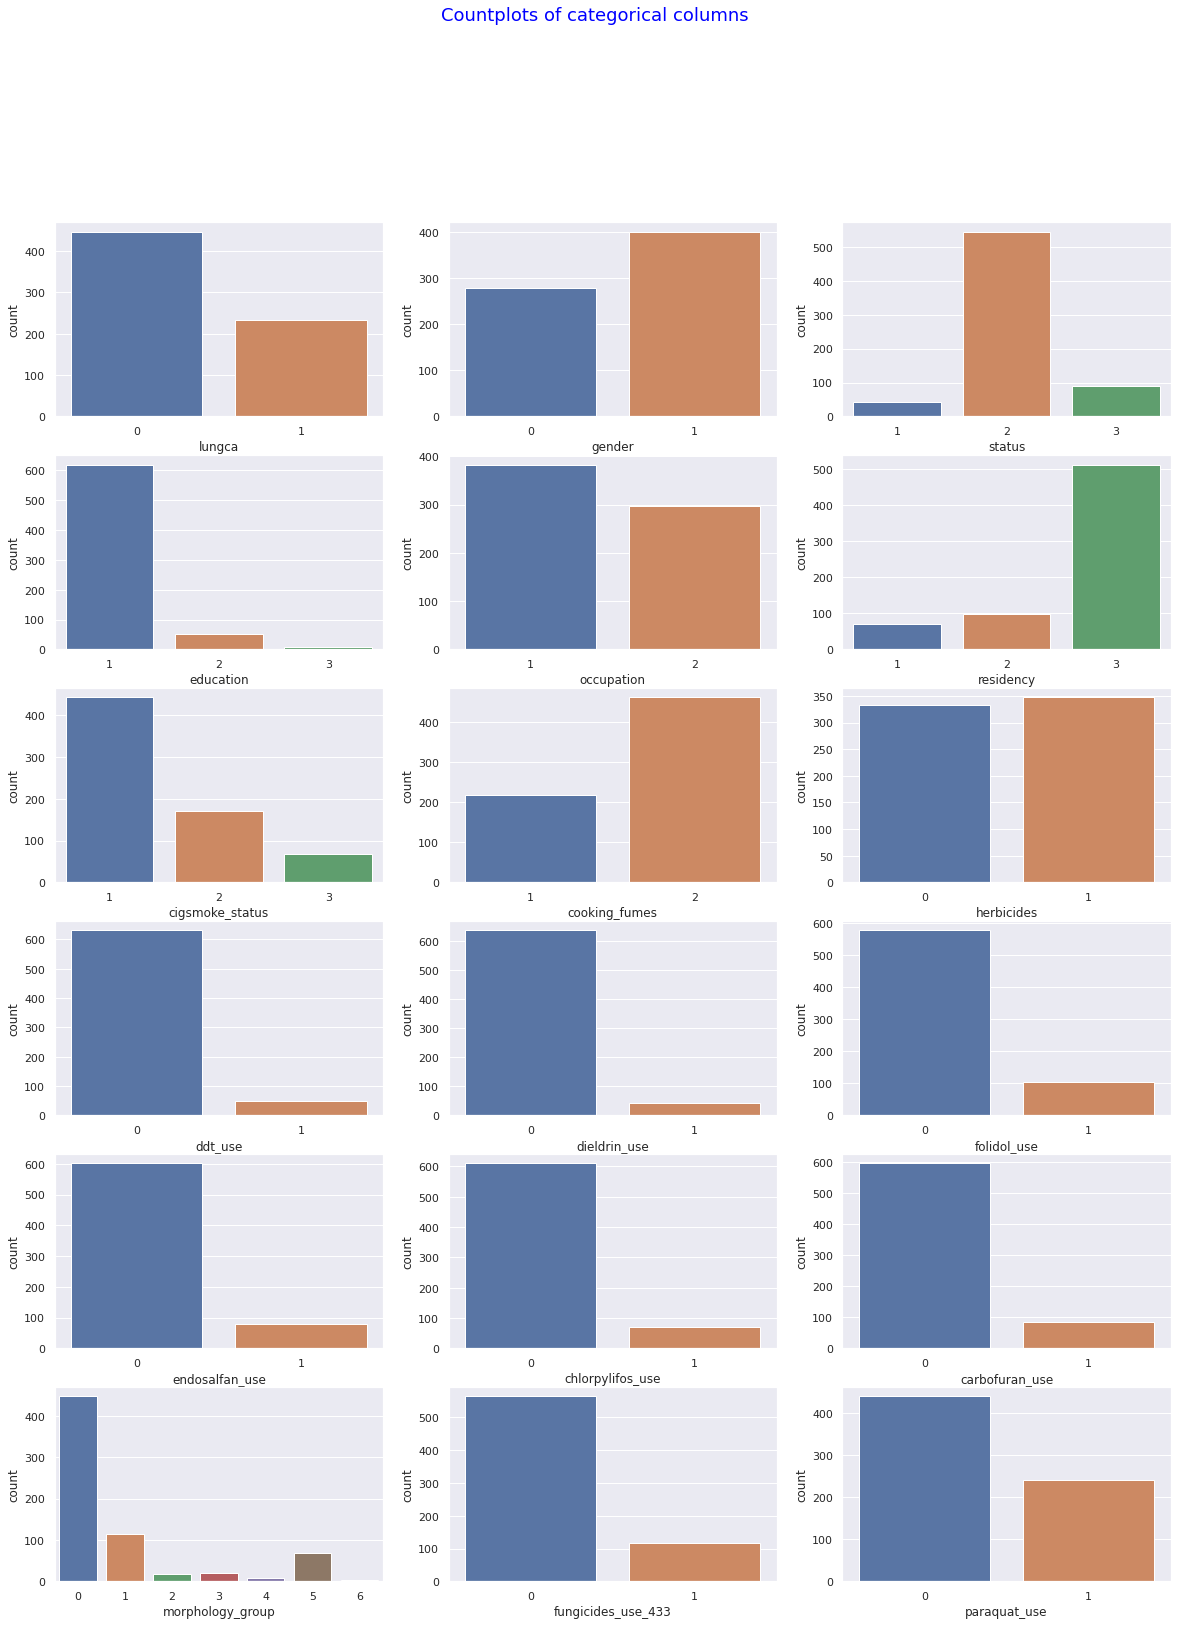

In [ ]:
# Countplot of categorical columns in the dataset
# creating a list of the categorical columns in the dataset
categorical_columns_1 =[ 'lungca', 'gender', 'status', 'education', 'occupation', 'residency', 'cigsmoke_status', 'cooking_fumes', 'herbicides', 'ddt_use', 'dieldrin_use', 'folidol_use', 'endosalfan_use', 'chlorpylifos_use', 'carbofuran_use', 'morphology_group', 'fungicides_use_433', 'paraquat_use']

# Set plot style
sns.set(style = 'darkgrid', context = 'notebook')

# Specify correlation
corr = lungCa.corr()

# Plot subplots
fig, axes = plt.subplots(nrows=6, ncols=3, figsize=(20,25))

# Insert sub-titles
plt.suptitle('Countplots of categorical columns', fontsize = 18, y = 1, color = 'blue')

# Plotting specified columns
for ax, data, column in zip(axes.flatten(), lungCa, categorical_columns_1):
   sns.countplot(lungCa[column], ax=ax)

### ii) Numerical Columns

In [ ]:
# Ploting the univariate summaries and recording our observations
def uni_stats(df):
  out_df = pd.DataFrame(columns=['Count', 'Nulls', 'Unique', 'Mode', 'Mean', 'Min','25%', 'Median', '75%', 'Max', 'Std_dev', 'Skew', 'Kurt' ])


  for col in df:
    if pd.api.types.is_numeric_dtype(df[col]):
      out_df.loc[col] = [df[col].count(), df[col].isnull().sum(), df[col].nunique(), df[col].mode().values[0], df[col].mean(), df[col].min(), 
                         df[col].quantile(0.25), df[col].median(), df[col].quantile(0.75), df[col].max(), df[col].std(), df[col].skew(), df[col].kurt()]

    else:
     out_df.loc[col] = [df[col].count(), df[col].isnull().sum(), df[col].nunique(),df[col].mode().values[0],'-', '-', '-', '-', 
                        '-', '-', '-', '-', '-']

  return out_df

uni_stats(lungCa)

,Count,Nulls,Unique,Mode,Mean,Min,25%,Median,75%,Max,Std_dev,Skew,Kurt
id,680.0,0.0,680.0,1.000000,127.803529,1.0,57.175000,114.150000,189.025000,292.2,83.800673,0.381277,-0.970208
lungca,680.0,0.0,2.0,0.000000,0.342647,0.0,0.000000,0.000000,1.000000,1.0,0.474944,0.664571,-1.562950
gender,680.0,0.0,2.0,1.000000,0.589706,0.0,0.000000,1.000000,1.000000,1.0,0.492249,-0.365549,-1.871888
age,680.0,0.0,56.0,62.000000,65.600000,31.0,58.000000,66.000000,74.000000,98.0,10.794724,-0.158161,-0.259570
age_group,680.0,0.0,4.0,3.000000,2.627941,1.0,2.000000,3.000000,3.000000,4.0,1.002845,-0.125623,-1.060735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
armure_propiconazole_use,680.0,0.0,2.0,0.000000,0.117647,0.0,0.000000,0.000000,0.000000,1.0,0.322427,2.378715,3.669067
armure_propiconazole_days,680.0,0.0,25.0,356.562500,356.562500,2.0,356.562500,356.562500,356.562500,1400.0,141.255092,3.980210,26.418648
metal_aldehyde_use,680.0,0.0,2.0,0.000000,0.063235,0.0,0.000000,0.000000,0.000000,1.0,0.243565,3.597014,10.970770
metal_aldehyde_days,680.0,0.0,30.0,592.511628,592.511628,2.0,592.511628,592.511628,592.511628,1680.0,99.195236,2.951416,41.887744


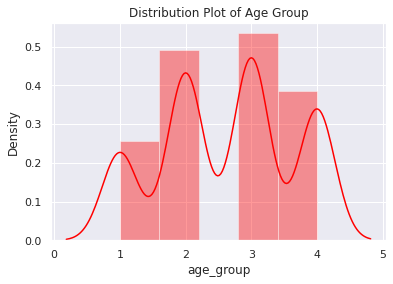

<Figure size 432x288 with 0 Axes>

In [ ]:
# distribution plot age group
sns.distplot(lungCa['age_group'], color ='red',bins=5)

# Insert title
plt.title("Distribution Plot of Age Group")

# Show plot
plt.show()

# Save plot
plt.savefig('Distribution Plot of Age Group.png')


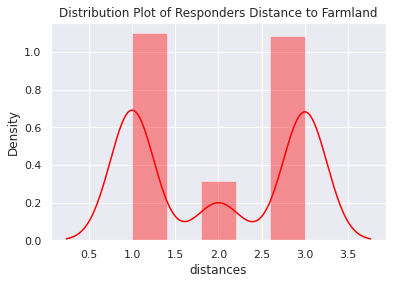

<Figure size 432x288 with 0 Axes>

In [ ]:
# distribution plot of Distances
sns.distplot(lungCa['distances'], color ='red',bins=5)

# Insert title
plt.title("Distribution Plot of Responders Distance to Farmland")

# Show plot
plt.show()

# Save plot
plt.savefig('Distribution plot of Distances.png')


## b) Bivariate Analysis

Text(0, 0.5, 'Lung Cancer')

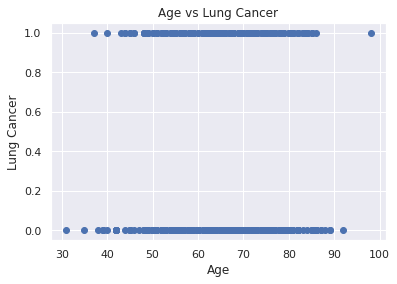

In [ ]:
# Scatterplot of lungca vs gender
plt.scatter(lungCa.age, lungCa.lungca)

# Insert title
plt.title('Age vs Lung Cancer')

# Label x-axis
plt.xlabel('Age')

# Label y-axis
plt.ylabel('Lung Cancer')

The x axis shows ages and the y axis shows people with and without lung cancer

This indicates that there is no correlation between people with and without lungcancer and their ages

In [ ]:
import statsmodels.api as sm

#define response variable
y = lungCa['lungca']

#define explanatory variable
x = lungCa[['age']]

#add constant to predictor variables
x = sm.add_constant(x)

#fit linear regression model
model = sm.OLS(y, x).fit()

#view model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 lungca   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.5964
Date:                Wed, 06 Apr 2022   Prob (F-statistic):              0.440
Time:                        13:24:52   Log-Likelihood:                -457.78
No. Observations:                 680   AIC:                             919.6
Df Residuals:                     678   BIC:                             928.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2571      0.112      2.290      0.0

This tells us that lung cancer is associated with an average increase of 0.0013 in the age

In [ ]:
# Lung cancer correlation
corr = lungCa.corr()
corr

,id,lungca,gender,age,age_group,status,education,occupation,residency,distances,...,carbaryl_savins_days,carbofuran_use,carbofuran_days,abamectin_use,abamectin_days,armure_propiconazole_use,armure_propiconazole_days,metal_aldehyde_use,metal_aldehyde_days,morphology_group
id,1.000000,0.004062,-0.103998,-0.043795,-0.045263,-0.069256,-0.023559,-0.032346,0.012270,0.057949,...,0.012726,0.021299,-0.014509,-0.087776,0.011995,-6.082328e-02,-8.140555e-03,0.045432,0.009325,-0.007039
lungca,0.004062,1.000000,-0.015128,0.029645,0.005225,-0.035933,-0.042476,0.001461,-0.002118,-0.005402,...,0.076315,0.130000,0.059021,-0.014915,0.076217,1.527466e-02,6.343583e-02,0.003389,-0.001803,0.762822
gender,-0.103998,-0.015128,1.000000,0.077993,0.081135,-0.059201,-0.006088,0.005168,-0.102863,-0.008449,...,0.053169,-0.028250,-0.010189,-0.007671,0.016157,-6.659244e-02,-3.258657e-02,-0.028957,-0.026656,0.021421
age,-0.043795,0.029645,0.077993,1.000000,0.944538,0.114536,-0.075436,0.013414,0.047176,-0.031158,...,-0.055495,0.024734,0.026204,-0.009391,-0.005520,-3.385146e-03,5.537039e-02,0.007394,0.014795,0.010562
age_group,-0.045263,0.005225,0.081135,0.944538,1.000000,0.108308,-0.083748,0.019236,0.043357,-0.036881,...,-0.057283,0.016085,0.032831,0.006847,0.006443,-1.473597e-02,5.473367e-02,0.006021,0.011438,-0.004202
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
armure_propiconazole_use,-0.060823,0.015275,-0.066592,-0.003385,-0.014736,0.087835,-0.001586,-0.229524,0.013867,-0.075841,...,-0.019096,0.179417,-0.057785,0.415787,-0.079864,1.000000e+00,4.633117e-18,0.130172,0.052535,0.022710
armure_propiconazole_days,-0.008141,0.063436,-0.032587,0.055370,0.054734,0.031625,-0.065847,0.044855,0.099239,0.107261,...,0.117094,0.076459,0.016223,0.109580,0.238617,4.633117e-18,1.000000e+00,0.103303,0.148012,0.044350
metal_aldehyde_use,0.045432,0.003389,-0.028957,0.007394,0.006021,0.027837,-0.042161,-0.155700,0.009637,0.059820,...,0.016667,0.157578,-0.064525,0.007997,0.065889,1.301720e-01,1.033032e-01,1.000000,0.018140,-0.031986
metal_aldehyde_days,0.009325,-0.001803,-0.026656,0.014795,0.011438,-0.044931,0.018178,-0.011040,0.000432,0.098586,...,0.115016,0.051247,-0.007602,0.060753,0.126841,5.253509e-02,1.480119e-01,0.018140,1.000000,0.004020


There is a weak correlation between the columns

In [ ]:
# Plotting the bivariate summaries
# Scatterplot
#sns.pairplot(lungCa)
#plt.show()

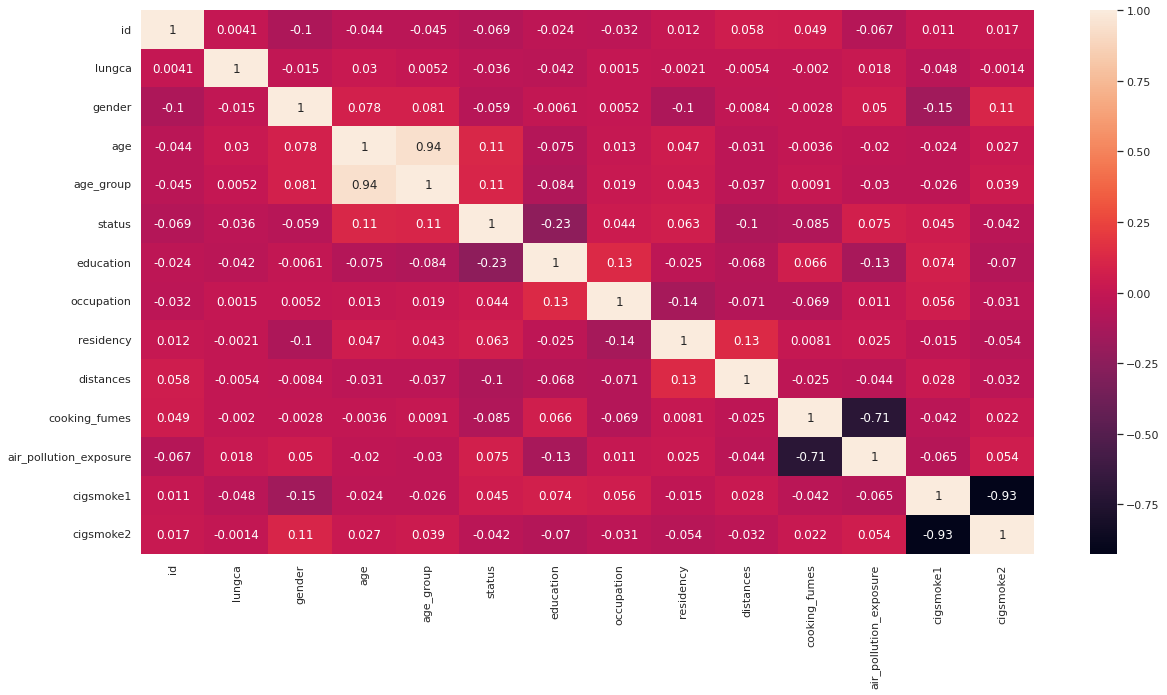

In [ ]:
# Specify figure size
plt.figure(figsize=(20,10))

# Plot correlation between attributes
sns.heatmap(lungCa[['id','lungca','gender','age','age_group','status','education','occupation','residency','distances','cooking_fumes','air_pollution_exposure','cigsmoke1','cigsmoke2']].corr(), annot=True)

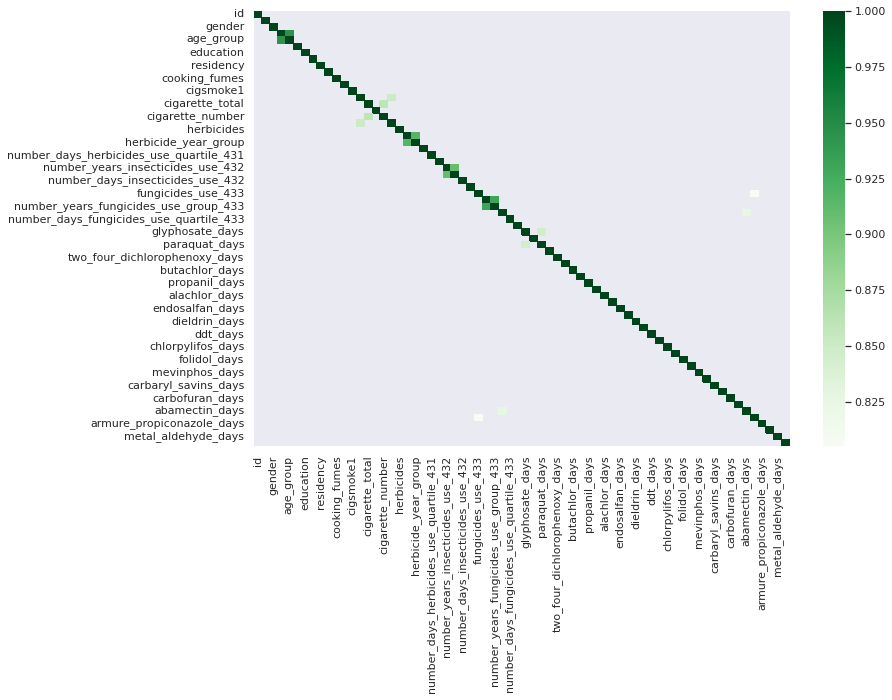

In [ ]:
# Plotting attributes with a high correlation greater than 0.5
kot = corr[corr>=.8]
plt.figure(figsize=(12,8))
sns.heatmap(kot, cmap="Greens")

##c) Normality Test

To determine which method to use while scaling the data, a statistical normality test is performed. The statitical technique choosen is the, D’Agostino’s K-squared test

D’Agostino’s K-squared test:

1. H0= The sample comes from a normal distribution.

2. HA=The sample is not coming from normal distribution.
Alfa = 0.05

In [ ]:

# Calucating stat and p value
stat, p = normaltest(lungCa.iloc[:, 0:2])

# Defining confidence intervall
alpha = 0.05
if p.all() > alpha:
  print('Sample looks Gaussian (fail to reject H0)')
elif p.any() > alpha:
  print('Some of the attributes have a normal distribution')
else:
  print('Sample does not look Gaussian (reject H0)')

Some of the attributes have a normal distribution


1. All the attributes in the dataframe do not have gausssian distribution. However some do

2. Hence a choice between parametric and non_parametric tests will be performed during hypothesis testing depending on the attribute/attributes under study




In [ ]:
# Checking number of cancer patients to those without
lungCa['lungca'].value_counts(ascending = True)

1    233
0    447
Name: lungca, dtype: int64

1 represents those patients with lung cancer while 0 reprsents the control group without cancer

##d) Hypothesis testing

- The propotion of males with lung cancer is equal to the propotion of females with lung cancer. H0: Pm=Pf, H1: Pm!=Pf
- The propotion of non-farmers with lung cancer is equal to the propotion of farmers with lung cancer. H0: Px=Py, H1: Px!=Py  

In [ ]:
# Testing the hypotheses with a = 0.05
# using non-parametric test
# create contingency tables and chi-squared test
# For prevalence of cancer by gender
#
Gen = pd.crosstab(index=lungCa['lungca'], columns=lungCa['gender'])

In [ ]:
# Specifying chiRes
chiRes = stats.chi2_contingency(Gen)

# Confidence level
a = 0.05

# Printing chi-square statistic, pvalue, and degree of freedom
print(f'chi-square statistic: {chiRes[0]}')
print(f'pvalue: {chiRes[1]}')
print(f'degree of freedom: {chiRes[2]}')

chi-square statistic: 0.09756497608114692
pvalue: 0.7547715603509121
degree of freedom: 1


The P-value > sinificance level hence, Fail to reject H0.


In [ ]:
# For lung cancer prevalence and occupation
#
Occ = pd.crosstab(index=lungCa['lungca'], columns=lungCa['occupation'])

In [ ]:
# Specifying ChiRes1
chiRes1 = stats.chi2_contingency(Occ)

# Confidence Level
a = 0.05

# Printing chi-square statistic, pvalue, and degree of freedom
print(f'chi-square statistic: {chiRes1[0]}')
print(f'pvalue: {chiRes1[1]}')
print(f'degree of freedom: {chiRes1[2]}')

chi-square statistic: 0.001880387670922436
pvalue: 0.9654118232946911
degree of freedom: 1


The P-value > sinificance level hence, Fail to reject H0.

# **7. Multivariate Analysis**

**Metrics**
1. Classification task: Predict individuals with lung cancer

2. Metric: Accuracy (90% and above is acceptable)

Link: https://machinelearningmastery.com/failure-of-accuracy-for-imbalanced-class-distributions/

3. Dataset shape: (680, 68)

4. Counts for each class: 
    - 1(patients with lung cancer) = 233
    - 0(patients without lung cancer) = 447

**Notes**
1. The age column is dropped since it has an equivalent in the dataframe(Age Group)

2. The ID is dropped since it is not needed in this analysis

In [ ]:
# Dropping age and Id_column
lungCa_1 = lungCa.drop(columns=['id', 'age'])

In [ ]:
len(lungCa_1.columns)

66

**Declaring the Feature Vector and Target Variable**

In [ ]:
# Declaring Feature Vector
X = lungCa_1.drop(['lungca'], axis=1)
# Declaring Target Variable
y = lungCa_1['lungca']

Splitting dataset into training and test set

In [ ]:
# Splitting into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [ ]:
# Checking shape of traing and test set
X_train.shape, X_test.shape

((476, 65), (204, 65))

##a) Feature Scaling

No feature engineering is going to be performed since all categorical variables in the dataset were already encoded

In [ ]:
# Scalinng
sc = StandardScaler()

# Transformtion of X-train
X_train = sc.fit_transform(X_train)

# Transformation of X-test
X_test = sc.transform(X_test)

In [ ]:
# performing lda
# Passing the value for the n_components parameter of the LDA
lda = LDA(n_components=1)

# Executing the fit and transform methods
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

##b) Random Forest Classifier model with default parameters

In [ ]:
# Initiate classifier
rfc = RandomForestClassifier(n_estimators=10, random_state=0)

# fit the model
rfc.fit(X_train, y_train)

# Predict the Test set results
y_pred = rfc.predict(X_test)

# Check accuracy score
accuracy_score(y_test, y_pred)

0.8970588235294118

##c) Random Forest Classifier with 100 decision trees

In [ ]:
# instantiate the classifier with n_estimators = 100
rfc_100 = RandomForestClassifier(n_estimators=100, random_state=0)

# fit the model to the training set
rfc_100.fit(X_train, y_train)

# Predict on the test set results
y_pred_100 = rfc_100.predict(X_test)

# Check accuracy score 
accuracy_score(y_test, y_pred_100)

0.8970588235294118

- The model accuracy score with 10 decision treesthe same with that at 100 decision tress at 0.8971
- This goes contrary to the expectations that the accuracy of the model increases with the number of decison trees
- This points out that the model might be overfitting the data
- This might be because the it contains more parameters than can be justified by the data 
- This shall be confirmed after a feature selection is performed to establish the most important features

##d) Feature Importance

In [ ]:
# Defining X_train1 to feed to random forest classifier
X_train1 = pd.DataFrame(X, columns=lungCa_1.columns[1:])
y_train1 = pd.DataFrame(y, columns=lungCa_1.columns[: 1])

In [ ]:
# Defining X_test1
X_test1 = pd.DataFrame(X, columns=[cols])
y_test1 = pd.DataFrame(y, columns=[cols])

In [ ]:
# create the classifier with n_estimators = 100
clf = RandomForestClassifier(n_estimators=100, random_state=0)

# fit the model to the training set
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [ ]:
# Defining Clf
clf = RandomForestClassifier(n_estimators=100, random_state=0)

# fit the model to the training set
clf.fit(X_train1, y_train1)

RandomForestClassifier(random_state=0)

In [ ]:
# Calculate feature Scores
feature_scores = pd.Series(clf.feature_importances_, index=X_train1.columns).sort_values(ascending=False)

# View feature score
feature_scores

morphology_group                           0.673903
herbicide_day                              0.043785
number_days_herbicides_use_quartile_431    0.015927
cigarette_total                            0.013183
cigarette_number                           0.013022
                                             ...   
propanil_use                               0.000873
mevinphos_use                              0.000853
endosalfan_use                             0.000847
armure_propiconazole_use                   0.000773
fungicides_use_433                         0.000533
Length: 65, dtype: float64

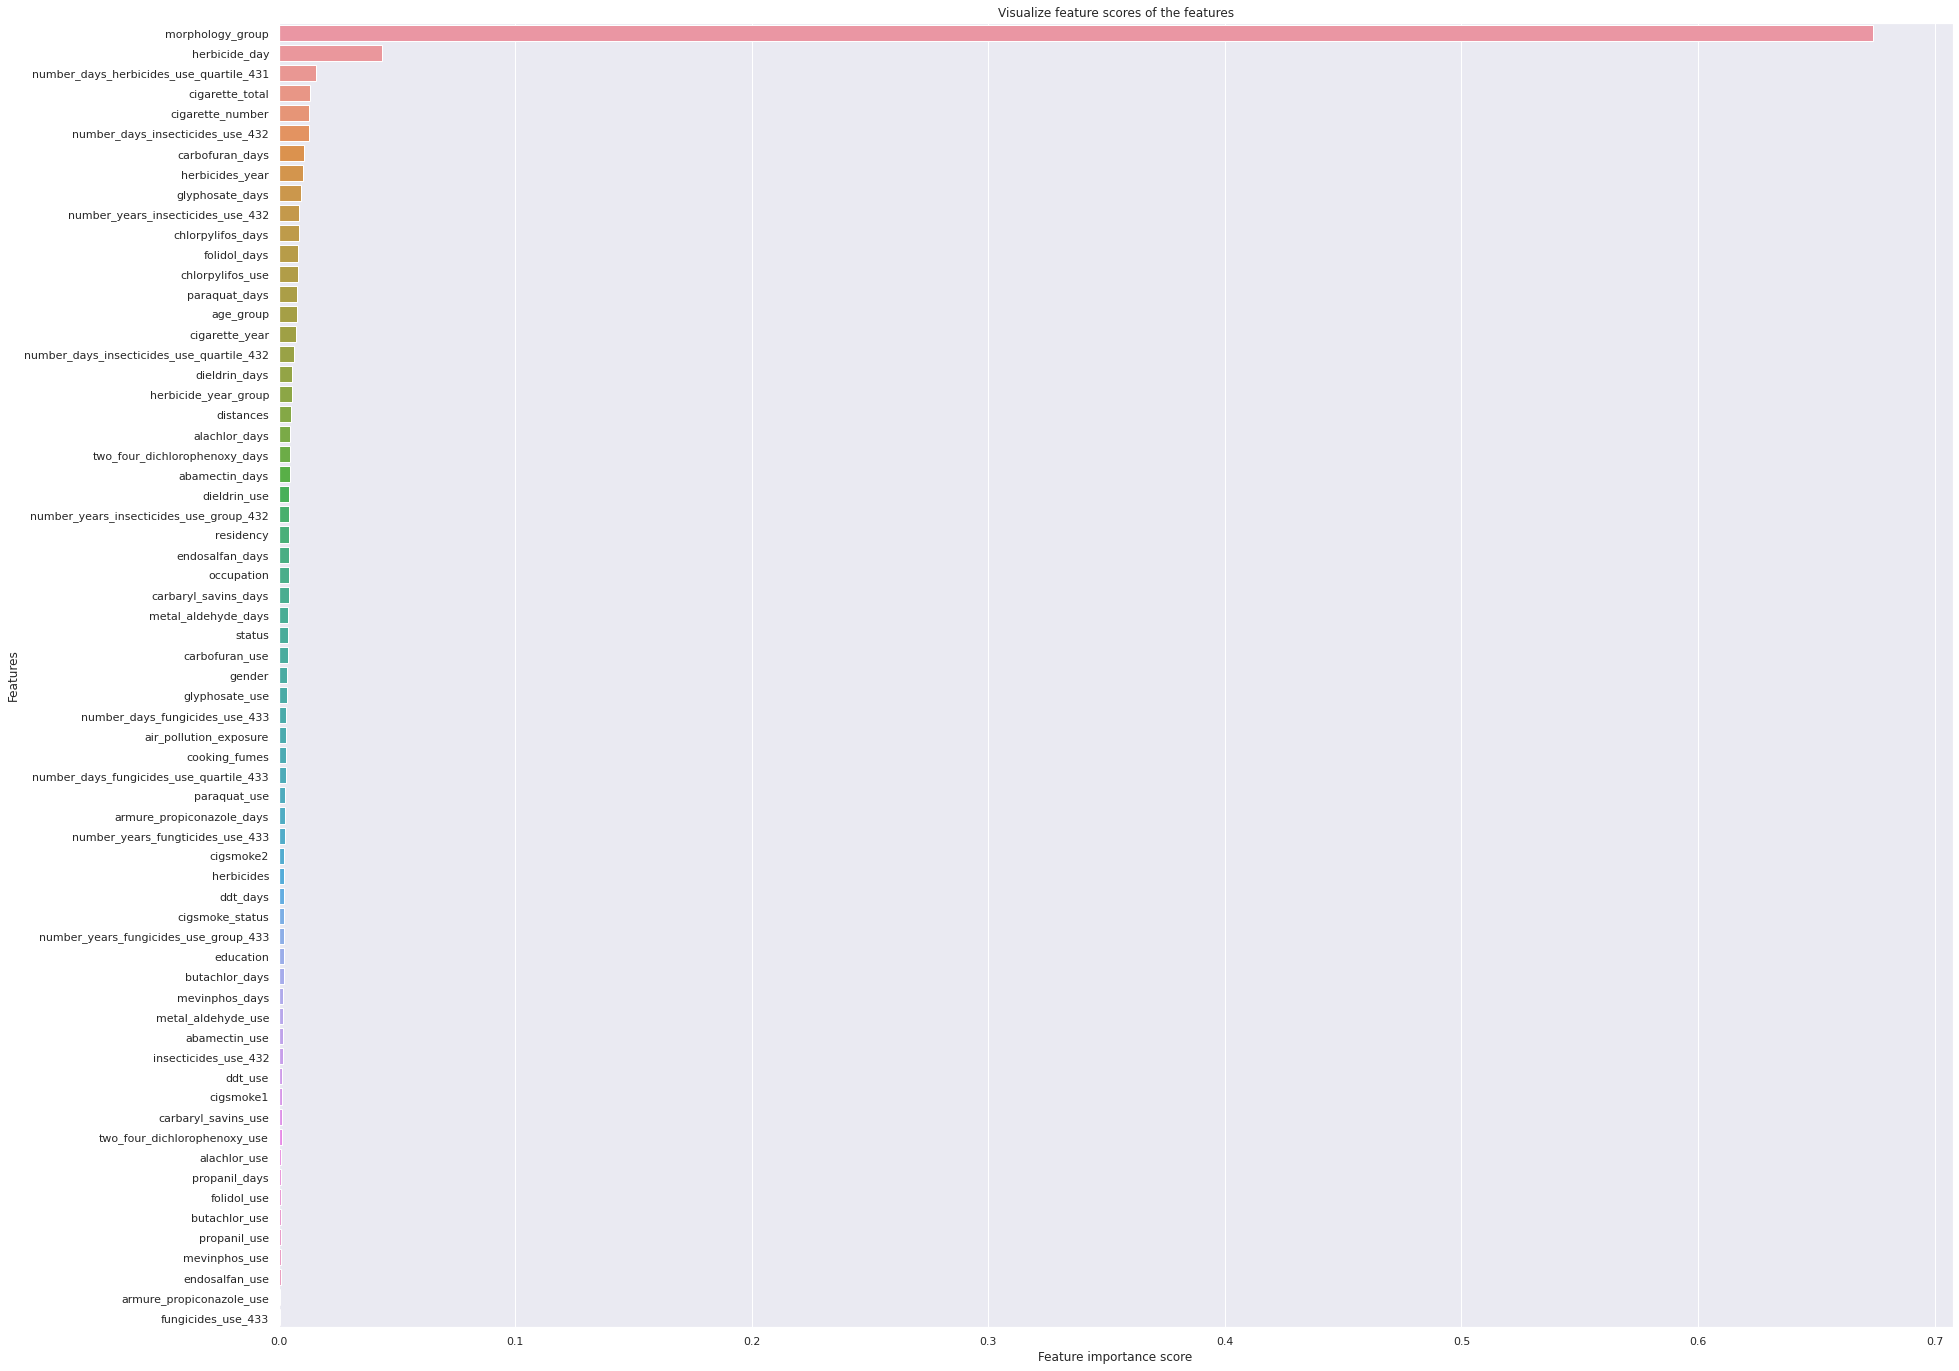

In [ ]:
# Plotting the features by importance
f, ax = plt.subplots(figsize=(30, 24))
ax = sns.barplot(x=feature_scores, y=feature_scores.index)
ax.set_title("Visualize feature scores of the features")
ax.set_yticklabels(feature_scores.index)
ax.set_xlabel("Feature importance score")
ax.set_ylabel("Features")
plt.show()

The three least important features included:
- endosalfan_use                             0.000847
- armure_propiconazole_use                   0.000773
- fungicides_use_433                         0.000533

The three most important features included:
- morphology_group                           0.673903
- herbicide_day                              0.043785
- number_days_herbicides_use_quartile_431    0.015927

##e) Building random forest model on selected features

Here we drop 'fungicides_use_433 ' attribute with the least importance to the model

In [ ]:
# Selecting the top six most important features
LungCa_2 = lungCa_1.drop(['fungicides_use_433' ], axis = 1)

# Defining features
X1 = LungCa_2.drop(['lungca'], axis=1)

# Defining target
y1 = LungCa_2['lungca']

In [ ]:
# Specifying the test and train datasets
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size = 0.3, random_state = 0)


In [ ]:
# check the shape of X_train and X_test
X_train1.shape, X_test1.shape

((476, 64), (204, 64))

In [ ]:
# Scaling 
sc = StandardScaler()

X_train1 = sc.fit_transform(X_train1)

X_test1 = sc.transform(X_test1)

In [ ]:
# performing lda
# Passing the value for the n_components parameter of the LDA
lda = LDA(n_components=1)

# Executing the fit and transform methods
X_train1 = lda.fit_transform(X_train1, y_train1)
X_test1 = lda.transform(X_test1)

###i) Using 10 decision trees

In [ ]:
# Instantiate the classifier with n_estimators = 10
clf = RandomForestClassifier(n_estimators=10, random_state=0)

# Fit the model to the training set
clf.fit(X_train1, y_train1)

# Predict on the test set results
y_pred1 = clf.predict(X_test1)

# Check accuracy score 
print('Model accuracy score with fungicides_use_433 variable removed : {0:0.4f}'. format(accuracy_score(y_test1, y_pred1)))

Model accuracy score with fungicides_use_433 variable removed : 0.9069


###ii) Using 100 Decision Trees

In [ ]:
# Instantiate the classifier with n_estimators = 100
clf = RandomForestClassifier(n_estimators=100, random_state=0)

# Fit the model to the training set
clf.fit(X_train1, y_train1)

# Predict on the test set results
y_pred1 = clf.predict(X_test1)

# Check accuracy score 
print('Model accuracy score with fungicides_use_433 removed : {0:0.4f}'. format(accuracy_score(y_test1, y_pred1)))

Model accuracy score with fungicides_use_433 removed : 0.9167


- Upon dropping the least important feature fungicides_use_433, the accuracy when using 10 decison trees was 0.9069
- When using 100 decison trees it was 0.9167. So as expected the accuracy increased with the number of decision trees
- Hence we can affirm that the issue of overfitting has been effectively dealt with

**Accuracy before and after feature selection**
- The accuracy with 100 decision trees after feature selection increased from 0.8971 prior to feature selection to 0.9167
- Hence it can be concluded that feature selection increased the accuracy of the model

# **8. Confusion matrix**

In [ ]:
# Print the Confusion Matrix and slice it into four pieces
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test1, y_pred1)

print('Confusion matrix\n\n', cm)

Confusion matrix

 [[130   5]
 [ 12  57]]


Our model predicted the results as follows:

1. True positives = 57 individuals were predicted to have lung cancer and they had lung cancer

2. True negatives = 130 people were predicted not to have lung cancer and they did not have lung cancer

3. False positives = 5 people were predicted to have lung cancer and they did not have lung cancer

4. False Negatives = 12 people were predicted not to have lung cancer and they had lung cancer

# **9. Classification Report**

In [ ]:
from sklearn.metrics import classification_report
# printing out classification report

print(classification_report(y_test1, y_pred1))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94       135
           1       0.92      0.83      0.87        69

    accuracy                           0.92       204
   macro avg       0.92      0.89      0.90       204
weighted avg       0.92      0.92      0.92       204



Precision - Our model correctly predicts an individual with lung cancer and withouth lung cancer 92 out of 100 cases

Recall - Our model is able to identify individuals without lung cancer accurately in 96 out of 100 individuals without lung cancer of the time - Our model on the other hand is able to identify individuals with cancer 83 out of 100 individuals with cancer

f1-score - Our model has an f1 score of for individuals without lung cancer of 0.94 and 0.87 for individuals with lung cancer *useful when comparing different classification models

Support - The model has a balanced support

# **10. Results and Conclusion**

**Hypothesis testing**
1. There is sufficient evidence to show that the propotion of males with lung cancer is probably equivalent to the propotion of females with lung cancer. 
2. There is sufficient evidence to show that the propotion of farmers with lung cancer is probably equivalent to the propotion of non-farmers with lung cancer. 


**Classification model**
1. In the model, we built a random forest classifier to predict the individuals with lung cancer. We employed two models, one with 10 decision trees and another with 100 decision trees

2. Using all the features in the original dataframe, an issue of over fitting was suspected since the model accuracy score before this step with 10 decision trees was the same to that using 100 decision tree at 0.8971.This called for the performance of feature importance

3. The least important feature meviponos use was dropped and the issue of over fitting was removed

4. Upon dropping the least important feature fungicides_use_433, the accuracy when using 10 decison trees was 0.9069. When using 100 decison trees it was 0.9167. So as expected the accuracy increased with the number of decision trees. 

5. The accuracy of the model also increased from 0.8971 at 100 decision tree to 0.9167 after feature importance evaluation.

6. The confusion matrix and classification report were other tools used to visualize model performance. They yielded good performance